In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('MICRODADOS_ENEM_2019.csv',sep=';',encoding='latin-1')

In [3]:
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,190006129589,2019,2928604,Santo Amaro,29,BA,28,F,2,2,...,A,A,A,B,A,A,B,A,A,B
5095266,190006129590,2019,2927408,Salvador,29,BA,25,M,1,2,...,A,A,A,A,A,A,B,A,A,A
5095267,190006129591,2019,2931806,Tremedal,29,BA,18,F,1,3,...,A,A,A,B,A,A,B,A,A,B
5095268,190006129592,2019,2927408,Salvador,29,BA,16,M,1,1,...,B,A,A,B,B,A,C,A,B,B


# Média das notas por área separadas de acordo com escolas públicas e particulares

In [5]:
dados_escolas_publicas = dados[dados['TP_ESCOLA'] == 2]
dados_escolas_publicas = dados_escolas_publicas.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
dados_escolas_publicas.dropna(inplace=True)
media_escolas_publicas = dados_escolas_publicas.mean()

In [12]:
dados_escolas_privadas = dados[dados['TP_ESCOLA'] == 3]
dados_escolas_privadas = dados_escolas_privadas.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
dados_escolas_privadas.dropna(inplace=True)
media_escolas_privadas = dados_escolas_privadas.mean()

In [10]:
medias_por_tipo_escola = pd.DataFrame({'Tipo de escola':['publica', 'privada'], 'CN':[media_escolas_publicas['NU_NOTA_CN'], media_escolas_privadas['NU_NOTA_CN']] ,'CH':[media_escolas_publicas['NU_NOTA_CH'], media_escolas_privadas['NU_NOTA_CH']], 'LC':[media_escolas_publicas['NU_NOTA_LC'], media_escolas_privadas['NU_NOTA_LC']], 'MT':[media_escolas_publicas['NU_NOTA_MT'], media_escolas_privadas['NU_NOTA_MT']], 'REDACAO':[media_escolas_publicas['NU_NOTA_REDACAO'], media_escolas_privadas['NU_NOTA_REDACAO']] })

In [94]:
medias_por_tipo_escola

,Tipo de escola,CN,CH,LC,MT,REDACAO
0,publica,460.744167,493.08396,509.347315,504.313954,554.561718
1,privada,540.524342,568.84036,566.285388,619.791815,724.857840


In [97]:
ds_medias_por_tipo_escola = pd.DataFrame({'Area':['CN', 'CH', 'LC', 'MT', 'RD', 'CN', 'CH', 'LC', 'MT', 'RD'], 
                                          'Media':[460.74, 493.08, 509.34, 504.31, 554.56, 540.52, 568.84, 566.28, 619.79, 724.85], 
                                          'Tipo de escola':['publica','publica','publica','publica','publica','privada','privada','privada','privada','privada']})

In [98]:
ds_medias_por_tipo_escola

,Area,Media,Tipo de escola
0,CN,460.74,publica
1,CH,493.08,publica
2,LC,509.34,publica
3,MT,504.31,publica
4,RD,554.56,publica
5,CN,540.52,privada
6,CH,568.84,privada
7,LC,566.28,privada
8,MT,619.79,privada
9,RD,724.85,privada


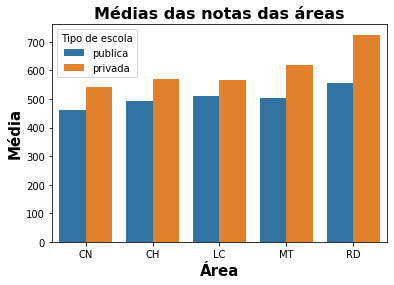

In [104]:
#plt.figure(figsize=(14,6))
grafico_medias_por_tipo_escola = sns.barplot(x='Area', y='Media', hue='Tipo de escola', data=ds_medias_por_tipo_escola)
plt.xlabel('Área', fontweight='bold', fontsize=15)
plt.ylabel('Média', fontweight='bold', fontsize=15)
plt.title('Médias das notas das áreas', fontweight='bold', fontsize=16)
plt.savefig('grafico_medias_por_tipo_escola.png', dpi=400)

# Percentual de alunos de escolas públicas com médias acima de 600 (Separadas por área)

In [28]:
dados_escolas_publicas = dados[dados['TP_ESCOLA'] == 2]
dados_escolas_publicas = dados_escolas_publicas.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
dados_escolas_publicas.dropna(inplace=True)

cn_escolas_publicas = dados_escolas_publicas[dados_escolas_publicas['NU_NOTA_CN'] > 600]
ch_escolas_publicas = dados_escolas_publicas[dados_escolas_publicas['NU_NOTA_CH'] > 600]
lc_escolas_publicas = dados_escolas_publicas[dados_escolas_publicas['NU_NOTA_LC'] > 600]
mt_escolas_publicas = dados_escolas_publicas[dados_escolas_publicas['NU_NOTA_MT'] > 600]
rd_escolas_publicas = dados_escolas_publicas[dados_escolas_publicas['NU_NOTA_REDACAO'] > 600]

In [53]:
percentual_publicas_cn = (len(cn_escolas_publicas)/len(dados_escolas_publicas))*100
percentual_publicas_ch = (len(ch_escolas_publicas)/len(dados_escolas_publicas))*100
percentual_publicas_lc = (len(lc_escolas_publicas)/len(dados_escolas_publicas))*100
percentual_publicas_mt = (len(mt_escolas_publicas)/len(dados_escolas_publicas))*100
percentual_publicas_rd = (len(rd_escolas_publicas)/len(dados_escolas_publicas))*100

# Percentual de alunos de escolas privadas com médias acima de 600 (Separadas por área)

In [60]:
dados_escolas_privadas = dados[dados['TP_ESCOLA'] == 3]
dados_escolas_privadas = dados_escolas_privadas.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
dados_escolas_privadas.dropna(inplace=True)

cn_escolas_privadas = dados_escolas_privadas[dados_escolas_privadas['NU_NOTA_CN'] > 600]
ch_escolas_privadas = dados_escolas_privadas[dados_escolas_privadas['NU_NOTA_CH'] > 600]
lc_escolas_privadas = dados_escolas_privadas[dados_escolas_privadas['NU_NOTA_LC'] > 600]
mt_escolas_privadas = dados_escolas_privadas[dados_escolas_privadas['NU_NOTA_MT'] > 600]
rd_escolas_privadas = dados_escolas_privadas[dados_escolas_privadas['NU_NOTA_REDACAO'] > 600]

In [61]:
percentual_privadas_cn = (len(cn_escolas_privadas)/len(dados_escolas_privadas))*100
percentual_privadas_ch = (len(ch_escolas_privadas)/len(dados_escolas_privadas))*100
percentual_privadas_lc = (len(lc_escolas_privadas)/len(dados_escolas_privadas))*100
percentual_privadas_mt = (len(mt_escolas_privadas)/len(dados_escolas_privadas))*100
percentual_privadas_rd = (len(rd_escolas_privadas)/len(dados_escolas_privadas))*100

# Tabela unificada com percentuais de escolas públicas e privadas

In [85]:
percentuais_escolas_acima_600_por_area = pd.DataFrame({'Tipo de escola':['publica', 'privada'], 
                                          'CN':[percentual_publicas_cn, percentual_privadas_cn],
                                          'CH':[percentual_publicas_ch, percentual_privadas_ch],
                                          'LC':[percentual_publicas_lc, percentual_privadas_lc],
                                          'MT':[percentual_publicas_mt, percentual_privadas_mt],
                                          'RD':[percentual_publicas_rd, percentual_privadas_rd]})

In [105]:
percentuais_escolas_acima_600_por_area

,Tipo de escola,CN,CH,LC,MT,RD
0,publica,2.394707,6.913092,4.530862,17.474541,36.465343
1,privada,21.101581,37.154972,26.863706,58.565764,76.903744


In [109]:
ds_percentuais_escolas_acima_600_por_area = pd.DataFrame({'Area':['CN', 'CH', 'LC', 'MT', 'RD', 'CN', 'CH', 'LC', 'MT', 'RD'], 
                                          'Media':[2.39, 6.91, 4.53, 17.47, 36.46, 21.10, 37.15, 26.86, 58.56, 76.90], 
                                          'Tipo de escola':['publica','publica','publica','publica','publica','privada','privada','privada','privada','privada']})

In [110]:
ds_percentuais_escolas_acima_600_por_area

,Area,Media,Tipo de escola
0,CN,2.39,publica
1,CH,6.91,publica
2,LC,4.53,publica
3,MT,17.47,publica
4,RD,36.46,publica
5,CN,21.10,privada
6,CH,37.15,privada
7,LC,26.86,privada
8,MT,58.56,privada
9,RD,76.90,privada


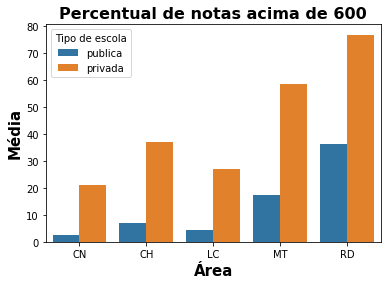

In [114]:
grafico_percentuais_escolas_acima_600_por_area = sns.barplot(x='Area', y='Media', hue='Tipo de escola', 
                                                             data=ds_percentuais_escolas_acima_600_por_area)
plt.xlabel('Área', fontweight='bold', fontsize=15)
plt.ylabel('Média', fontweight='bold', fontsize=15)
plt.title('Percentual de notas acima de 600', fontweight='bold', fontsize=16)
plt.savefig('grafico_percentuais_escolas_acima_600_por_area.png', dpi=400)

###### Percentual de alunos de escolas públicas com todas as médias acima de 600

In [76]:
todas_as_areas_escolas_publicas = dados_escolas_publicas[(dados_escolas_publicas['NU_NOTA_CN'] > 600) & 
                                                         (dados_escolas_publicas['NU_NOTA_CH'] > 600) &
                                                         (dados_escolas_publicas['NU_NOTA_LC'] > 600) &
                                                         (dados_escolas_publicas['NU_NOTA_MT'] > 600) &
                                                         (dados_escolas_publicas['NU_NOTA_REDACAO'] > 600)]

In [79]:
percentual_todas_as_areas_escolas_publicas = (len(todas_as_areas_escolas_publicas)/len(dados_escolas_publicas))*100
percentual_todas_as_areas_escolas_publicas

1.04480656571458

# Percentual de alunos de escolas privadas com todas as médias acima de 600

In [80]:
todas_as_areas_escolas_privadas = dados_escolas_privadas[(dados_escolas_privadas['NU_NOTA_CN'] > 600) & 
                                                         (dados_escolas_privadas['NU_NOTA_CH'] > 600) &
                                                         (dados_escolas_privadas['NU_NOTA_LC'] > 600) &
                                                         (dados_escolas_privadas['NU_NOTA_MT'] > 600) &
                                                         (dados_escolas_privadas['NU_NOTA_REDACAO'] > 600)]

In [82]:
percentual_todas_as_areas_escolas_privadas = (len(todas_as_areas_escolas_privadas)/len(dados_escolas_privadas))*100
percentual_todas_as_areas_escolas_privadas

12.781835196959026

# Tabela unificada com os percentuais de alunos de escolas públicas e privadas que obtiveram nota maior do que 600 em todas as areas

In [87]:
percentuais_escolas_acima_600_todas_as_areas = pd.DataFrame({'Tipo de escola':['publica', 'privada'], 
                                          'Todas as areas':[percentual_todas_as_areas_escolas_publicas, percentual_todas_as_areas_escolas_privadas]})

In [88]:
percentuais_escolas_acima_600_todas_as_areas

,Tipo de escola,Todas as areas
0,publica,1.044807
1,privada,12.781835


# Separação por cidade, estado e país (Goiânia - GO - Brasil)

In [82]:
dados_redacao_goiania = dados[dados['NO_MUNICIPIO_RESIDENCIA'] == 'Goiânia']
dados_redacao_goiania = dados_redacao_goiania.filter(items=['NU_NOTA_REDACAO'])
dados_redacao_goiania.dropna(inplace=True)

dados_redacao_goias = dados[dados['SG_UF_RESIDENCIA'] == 'GO']
dados_redacao_goias = dados_redacao_goias.filter(items=['NU_NOTA_REDACAO'])
dados_redacao_goias.dropna(inplace=True)

dados_redacao_brasil = dados.filter(items=['NU_NOTA_REDACAO'])
dados_redacao_brasil.dropna(inplace=True)

In [83]:
redacao_goiania_x_goias_x_brasil = pd.DataFrame({'localidade':['goiania', 'goias', 'brasil'], 'media':[dados_redacao_goiania.mean().values[0], dados_redacao_goias.mean().values[0], dados_redacao_brasil.mean().values[0]]})

In [84]:
redacao_goiania_x_goias_x_brasil

,localidade,media
0,goiania,631.512531
1,goias,576.150639
2,brasil,571.188348


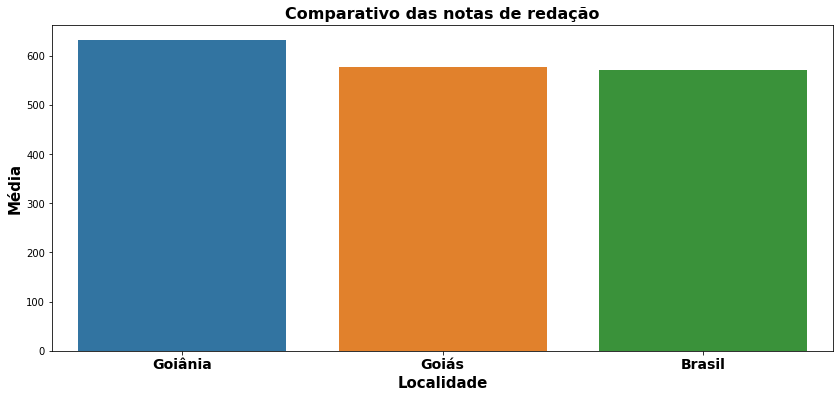

In [85]:
plt.figure(figsize=(14,6))
redacao_goiania_x_goias_x_brasil = sns.barplot(x='localidade', y='media', data=redacao_goiania_x_goias_x_brasil)
plt.xlabel('Localidade', fontweight='bold', fontsize=15)
plt.ylabel('Média', fontweight='bold', fontsize=15)
plt.xticks(np.arange(3), ('Goiânia', 'Goiás', 'Brasil'), fontweight='bold', fontsize=14)
plt.title('Comparativo das notas de redação', fontweight='bold', fontsize=16)
plt.savefig('redacao_goiania_x_goias_x_brasil.png', dpi=400)

In [91]:
dados_matematica_goiania = dados[dados['NO_MUNICIPIO_RESIDENCIA'] == 'Goiânia']
dados_matematica_goiania = dados_matematica_goiania.filter(items=['NU_NOTA_MT'])
dados_matematica_goiania.dropna(inplace=True)

dados_matematica_goias = dados[dados['SG_UF_RESIDENCIA'] == 'GO']
dados_matematica_goias = dados_matematica_goias.filter(items=['NU_NOTA_MT'])
dados_matematica_goias.dropna(inplace=True)

dados_matematica_brasil = dados.filter(items=['NU_NOTA_MT'])
dados_matematica_brasil.dropna(inplace=True)

In [92]:
matematica_goiania_x_goias_x_brasil = pd.DataFrame({'localidade':['goiania', 'goias', 'brasil'], 'media':[dados_matematica_goiania.mean().values[0], dados_matematica_goias.mean().values[0], dados_matematica_brasil.mean().values[0]]})

In [93]:
matematica_goiania_x_goias_x_brasil

,localidade,media
0,goiania,554.708796
1,goias,523.386851
2,brasil,523.124122


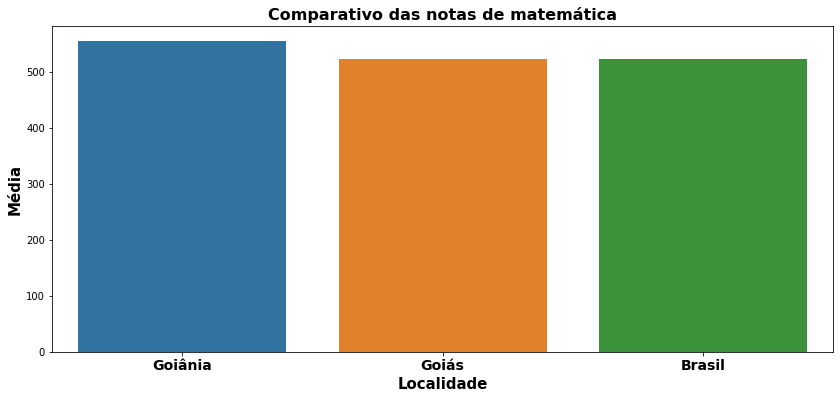

In [94]:
plt.figure(figsize=(14,6))
matematica_goiania_x_goias_x_brasil = sns.barplot(x='localidade', y='media', data=matematica_goiania_x_goias_x_brasil)
plt.xlabel('Localidade', fontweight='bold', fontsize=15)
plt.ylabel('Média', fontweight='bold', fontsize=15)
plt.xticks(np.arange(3), ('Goiânia', 'Goiás', 'Brasil'), fontweight='bold', fontsize=14)
plt.title('Comparativo das notas de matemática', fontweight='bold', fontsize=16)
plt.savefig('matematica_goiania_x_goias_x_brasil.png', dpi=400)

In [15]:
dados[dados['NO_MUNICIPIO_RESIDENCIA'] == 'Goiânia']

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
7602,190001012229,2019,5208707,Goiânia,52,GO,19,F,1,3,...,A,A,A,B,A,A,E,A,A,B
17333,190001021960,2019,5208707,Goiânia,52,GO,20,F,1,1,...,B,A,A,C,A,B,C,A,B,B
26826,190001031454,2019,5208707,Goiânia,52,GO,18,F,1,3,...,A,A,A,A,B,A,B,A,A,A
28978,190001033606,2019,5208707,Goiânia,52,GO,18,F,1,1,...,B,A,B,B,B,B,D,A,B,B
33196,190001037824,2019,5208707,Goiânia,52,GO,31,M,1,5,...,A,A,A,B,A,A,C,A,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087145,190006108565,2019,5208707,Goiânia,52,GO,23,F,1,1,...,A,A,A,B,A,A,C,A,A,A
5087147,190006108567,2019,5208707,Goiânia,52,GO,21,M,1,3,...,A,A,A,A,A,A,D,A,A,B
5087148,190006108568,2019,5208707,Goiânia,52,GO,19,M,1,3,...,B,A,A,C,B,B,E,B,B,B
5094577,190006119204,2019,5208707,Goiânia,52,GO,21,M,1,3,...,A,A,A,B,A,A,C,A,B,B


In [15]:
colunasSelecionadas = ['TP_SEXO', 'NU_NOTA_REDACAO']

In [16]:
microDadosEnemSexoRedacao = dados.filter(items=colunasSelecionadas)

In [18]:
microDadosEnemSexoRedacao = microDadosEnemSexoRedacao.dropna() 

In [19]:
microDadosEnemSexoRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,780.0
1,F,600.0
2,F,640.0
5,M,580.0
6,F,360.0


In [24]:
microDadosEnemSexoRedacao.groupby('TP_SEXO').count()
#microDadosEnemSexoRedacao.groupby('TP_SEXO').max()
#microDadosEnemSexoRedacao.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,2336431
M,1586713


# Filtrar valores maiores do que zero

In [30]:
microDadosEnemSexoRedacao[microDadosEnemSexoRedacao['NU_NOTA_REDACAO'] > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


# Analisar a média da nota de redação entre os dois sexos

In [29]:
microDadosEnemSexoRedacao.groupby('TP_SEXO').mean()
#microDadosEnemSexoRedacao.groupby('TP_SEXO').mean() MEDIANA

,NU_NOTA_REDACAO
TP_SEXO,
F,577.159368
M,562.396035


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

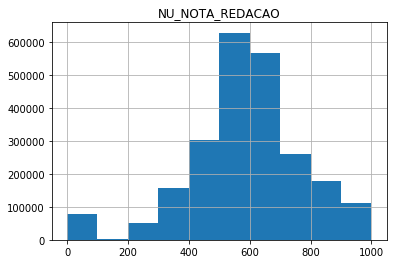

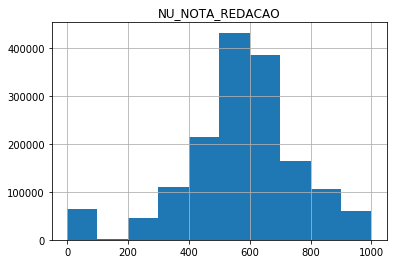

In [31]:
microDadosEnemSexoRedacao.groupby('TP_SEXO').hist()

In [32]:
microDadosEnemSexoRedacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2336431.0  577.159368  187.536483  0.0  480.0  580.0  680.0   
M             1586713.0  562.396035  190.214499  0.0  480.0  580.0  660.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

# Análise das notas por área

In [3]:
microDadosEnemNotasAreas = dados.filter(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'])

In [5]:
microDadosEnemNotasAreas = microDadosEnemNotasAreas.dropna()

In [10]:
microDadosEnemNotasAreas.max()

NU_NOTA_CN    860.9
NU_NOTA_CH    835.1
NU_NOTA_LC    801.7
NU_NOTA_MT    985.5
dtype: float64

In [19]:
microDadosEnemNotasAreas[(microDadosEnemNotasAreas['NU_NOTA_CN'] > 0) & (microDadosEnemNotasAreas['NU_NOTA_CH'] > 0) & (microDadosEnemNotasAreas['NU_NOTA_LC'] > 0) & (microDadosEnemNotasAreas['NU_NOTA_MT'] > 0)].min()

NU_NOTA_CN    327.9
NU_NOTA_CH    315.9
NU_NOTA_LC    322.0
NU_NOTA_MT    359.0
dtype: float64

# Análise de notas com relação à escolaridade dos pais dos participantes

In [4]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [5]:
microdadosSelecionados = dados.filter(items=colunasSelecionadas)

In [6]:
microdadosSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,369.1,780.0,D,E
1,190001004628,416.5,600.0,D,E
2,190001004629,571.5,640.0,H,E
3,190001004630,NaN,NaN,D,D
4,190001004631,NaN,NaN,B,C


In [7]:
microdadosSelecionados = microdadosSelecionados.dropna()

In [9]:
microdadosSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,369.1,780.0,D,E
1,190001004628,416.5,600.0,D,E
2,190001004629,571.5,640.0,H,E
5,190001004632,605.3,580.0,C,C
6,190001004633,581.5,360.0,B,B


In [10]:
q001e002Dicionario = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei'
}

In [11]:
q001e002Dicionario

{'A': 'Nunca estudou',
 'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
 'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
 'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
 'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
 'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
 'G': 'Completou a Pós-graduação.',
 'H': 'Não sei'}

In [12]:
microdadosSelecionados.filter(items=['Q001','NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,186186
B,752563
C,515785
D,433193
E,1006255
F,308319
G,193529
H,306177


In [13]:
microdadosSelecionados['NO_Q001'] = [q001e002Dicionario[resp] for resp in microdadosSelecionados.Q001]

In [15]:
microdadosSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
0,190001004627,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
1,190001004628,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
2,190001004629,571.5,640.0,H,E,Não sei
5,190001004632,605.3,580.0,C,C,"Completou a 4ª série/5º ano, mas não completou..."
6,190001004633,581.5,360.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...


In [16]:
microdadosSelecionados['NO_Q002'] = [q001e002Dicionario[resp] for resp in microdadosSelecionados.Q002]

In [18]:
microdadosSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
0,190001004627,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
1,190001004628,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
2,190001004629,571.5,640.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
5,190001004632,605.3,580.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
6,190001004633,581.5,360.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...


# Análise da escolaridade do pais dos candidatos

In [24]:
microdadosSelecionados.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",1006255
Não completou a 4ª série/5º ano do Ensino Fundamental.,752563
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",515785
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",433193
"Completou a Faculdade, mas não completou a Pós-graduação.",308319
Não sei,306177
Completou a Pós-graduação.,193529
Nunca estudou,186186


# Análise da escolaridade das mães dos candidatos

In [26]:
microdadosSelecionados.filter(items=['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",1234774
Não completou a 4ª série/5º ano do Ensino Fundamental.,551516
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",475782
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",471827
"Completou a Faculdade, mas não completou a Pós-graduação.",416291
Completou a Pós-graduação.,333159
Nunca estudou,121022
Não sei,97636
